### Further AIRSEA flux

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import netCDF4 as nc
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

plt.rcParams.update({'font.size': 12})

#### establish and store a regional mask

In [4]:
# mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = mesh.variables['tmask'][0, 0, :, :]

# mask = np.zeros_like(tmask)
# mask[tmask>0] = 4

# for y in range(0,898):
#     for x in range(0,398):
        
#         if  (x <185) & (y>220) & (y<500) & (tmask[y,x] >0) :
#             mask[y,x] = 1
#         if  (y >= 550) & (tmask[y,x] > 0):
#             mask[y,x] = 2
#         if (x> 150) & (y>355) & (y<550) & (tmask[y,x]>0):
#             mask[y,x] = 3

# pickle.dump(mask, open("reg_mask.pkl", 'wb'))

Text(0.5, 1.0, 'regional mask')

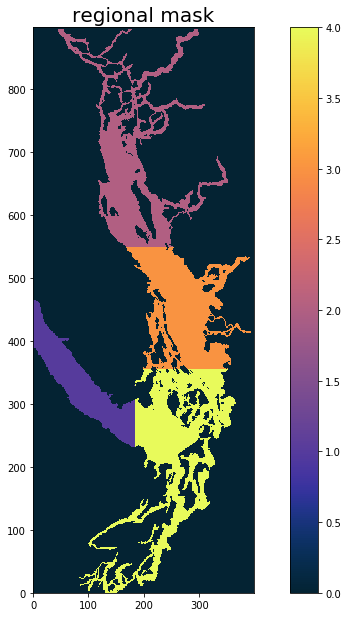

In [5]:

reg_mask = pickle.load(open('./reg_mask.pkl', 'rb'))  

fact = 0.65
fig, ax = plt.subplots(1, 1, figsize=(20*fact, 16*fact))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(reg_mask, cmap=cm.cm.thermal)
fig.colorbar(mesh)
plt.title('regional mask',fontsize=20)


### load calculated AS flux (from PI carbon paper work), and calculate mean monthly fluxes for each of the above regions for each of years 2013-2017 (2018-2019 not available)

In [6]:
sec_day = 60*60*24 #CONVERT FROM MMOL/M2/SEC TO MMOL/M2/DAY
#factor of 1.11 is asselin filter mishap
hindcast2013_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2013.pkl', 'rb'))  * sec_day * 1.11
hindcast2014_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2014.pkl', 'rb'))  * sec_day * 1.11
hindcast2015_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2015.pkl', 'rb'))  * sec_day * 1.11
hindcast2016_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2016.pkl', 'rb'))  * sec_day * 1.11
hindcast2017_co2_flx = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/hind_insitu_2017.pkl', 'rb'))  * sec_day * 1.11

In [7]:
# flux_monthly_stor = np.zeros([5,4,12])

# hinds = [hindcast2013_co2_flx,hindcast2014_co2_flx,hindcast2015_co2_flx,
#          hindcast2016_co2_flx,hindcast2017_co2_flx]

# for yr in range(0,5):
#     hind = hinds[yr]
#     print(yr+2013)
#     for m in range(0,12):
#         print(m+1)
#         hind_month = np.nanmean(hind[m*30:m*30+30:,:],axis =0)
#         for reg in range(1,5):
#             flux_monthly_stor[yr,reg-1,m] = np.nanmean(hind_month[reg_mask == reg])
            
# pickle.dump(flux_monthly_stor, open("flux_monthly_stor.pkl", 'wb'))

In [8]:
flux_monthly_stor = pickle.load(open('./flux_monthly_stor.pkl', 'rb'))

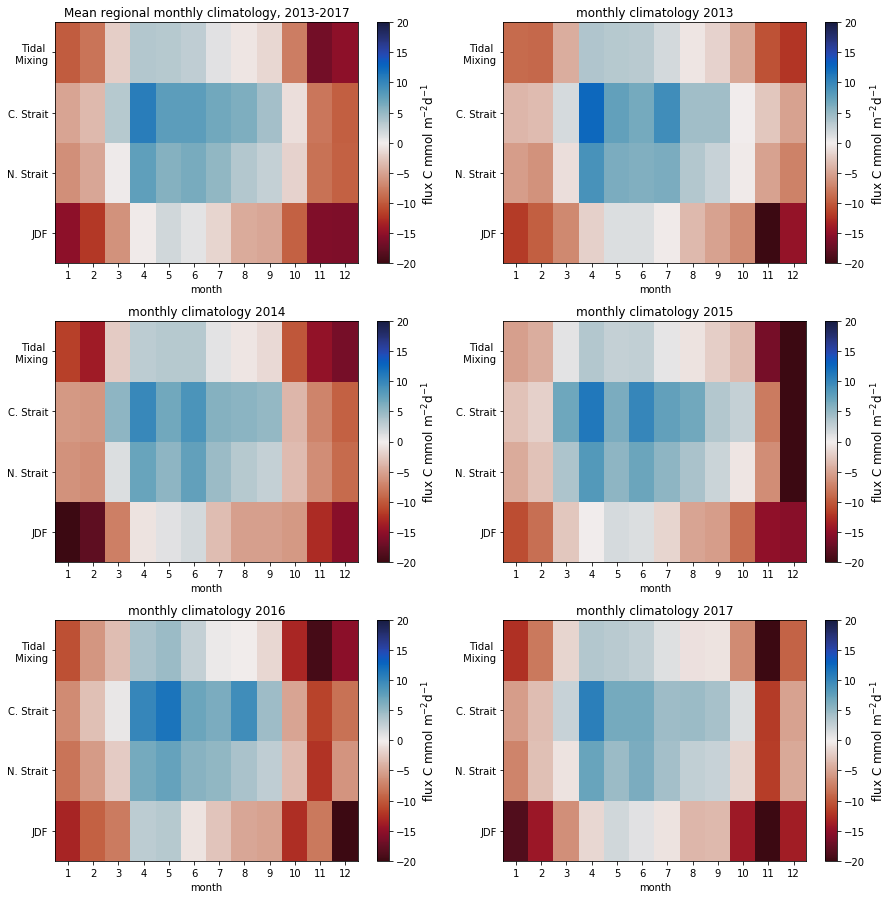

In [9]:
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

section_slice = np.arange(1,14,1)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
regs = np.arange(0,5,1)

ax1 = plt.subplot2grid((3,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(flux_monthly_stor[:,:,:],axis=0)
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('Mean regional monthly climatology, 2013-2017')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)


ax1 = plt.subplot2grid((3,2), (0,1), colspan=1,rowspan = 1)
tdat = (flux_monthly_stor[0,:,:])
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('monthly climatology 2013')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((3,2), (1,0), colspan=1,rowspan = 1)
tdat = (flux_monthly_stor[1,:,:])
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('monthly climatology 2014')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((3,2), (1,1), colspan=1,rowspan = 1)
tdat = (flux_monthly_stor[2,:,:])
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('monthly climatology 2015')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((3,2), (2,0), colspan=1,rowspan = 1)
tdat = (flux_monthly_stor[3,:,:])
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('monthly climatology 2016')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((3,2), (2,1), colspan=1,rowspan = 1)
tdat = (flux_monthly_stor[4,:,:])
ax1.set_yticks([0.5,1.5,2.5,3.5]); ax1.set_yticklabels(['JDF','N. Strait','C. Strait','Tidal \n Mixing'])
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],regs,tdat, 
                       cmap = cm.cm.balance_r, vmin = -20, vmax = 20)
cbar = plt.colorbar(mesh); ax1.set_xlabel('month')
ax1.set_title('monthly climatology 2017')
cbar.set_label('flux C mmol m$^{-2}$d$^{-1}$', fontsize = 12)


plt.tight_layout()

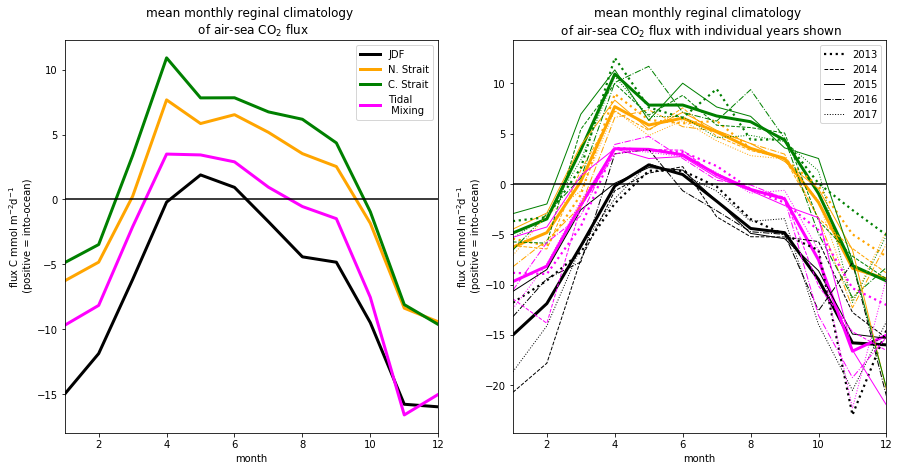

In [10]:

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(flux_monthly_stor[:,:,:],axis=0)
colors = ['k','orange','green','fuchsia']; labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']
for i in range(0,4):
    ax1.plot(np.arange(1,13,1),tdat[i,:],linewidth = 3, color = colors[i], label = labels[i])
ax1.set_xlim([1,12]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('mean monthly reginal climatology \n of air-sea CO$_2$ flux')
ax1.set_ylabel('flux C mmol m$^{-2}$d$^{-1}$ \n (positive = into-ocean)')

ax1 = plt.subplot2grid((1,2), (0,1), colspan=1,rowspan = 1)
tdat = np.nanmean(flux_monthly_stor[:,:,:],axis=0)
colors = ['k','orange','green','fuchsia']; 
linestyles = [':', '--', '-', '-.', ':']
labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']
for i in range(0,4):
    ax1.plot(np.arange(1,13,1),tdat[i,:],linewidth = 3, color = colors[i])
for i in range(0,4):
    for j in range(0,5):
        le = 1
        if j == 0: le = 2.2
        if i == 0:
            ax1.plot(np.arange(1,13,1),flux_monthly_stor[j,i,:],linewidth = le, \
                 linestyle = linestyles[j],color = colors[i], label = str(2013+j))
        else:
            ax1.plot(np.arange(1,13,1),flux_monthly_stor[j,i,:],linewidth = le, \
                 linestyle = linestyles[j],color = colors[i])


ax1.set_xlim([1,12]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('mean monthly reginal climatology \n of air-sea CO$_2$ flux with individual years shown')
ax1.set_ylabel('flux C mmol m$^{-2}$d$^{-1}$ \n (positive = into-ocean)')

plt.tight_layout()


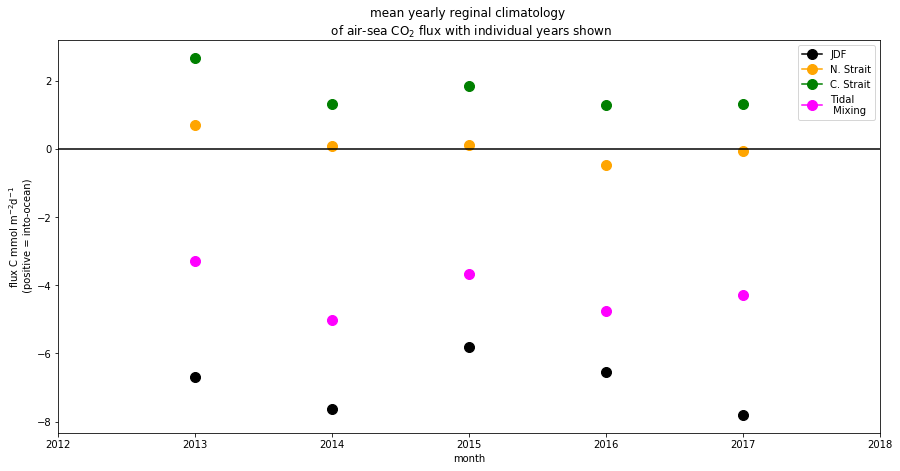

In [23]:
fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

ax1 = plt.subplot2grid((1,1), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(flux_monthly_stor[:,:,:],axis=0)
colors = ['k','orange','green','fuchsia']; 
linestyles = [':', '--', '-', '-.', ':']
labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']

for i in range(0,4):
    for j in range(0,5):
#         print(np.nanmean(flux_monthly_stor[j,i,:]))
        if j == 0:
            ax1.plot(j+2013,np.nanmean(flux_monthly_stor[j,i,:]), marker = 'o', markersize = 10,
                         color = colors[i], label = labels[i])
        if j != 0:
            ax1.plot(j+2013,np.nanmean(flux_monthly_stor[j,i,:]), marker = 'o', markersize = 10,
                         color = colors[i])

ax1.legend()
ax1.set_xlim([2012,2018]); 
ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('mean yearly reginal climatology \n of air-sea CO$_2$ flux with individual years shown')
ax1.set_ylabel('flux C mmol m$^{-2}$d$^{-1}$ \n (positive = into-ocean)')

plt.tight_layout()
